In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection import DropCorrelatedFeatures






##model development libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score
from sklearn.utils.class_weight import compute_class_weight


In [2]:
full_data = pd.read_csv('app/src/artefacts/data/bank-full.csv',sep=";", low_memory=False)
sample_data = pd.read_csv('app/src/artefacts/data/bank.csv',sep=";", low_memory=False)

In [3]:
#preview the data
print("Full Data Sample:")
full_data.head(10)

Full Data Sample:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
print("Full Data Null Values:")
print(full_data.isnull().sum())
print("sample data null values:")
print(sample_data.isnull().sum())

Full Data Null Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
sample data null values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
#check for the data types and shape of the data
print("Full Data Shape:")
print(full_data.shape)
print("Full Data Types:")
print(full_data.dtypes)
print("Sample Data Shape:")
print(sample_data.shape)
print("Sample Data Types:")
print(sample_data.dtypes)


Full Data Shape:
(45211, 17)
Full Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
Sample Data Shape:
(4521, 17)
Sample Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [6]:
full_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
#check for duplicates
print("Full Data Duplicates:")
print(full_data.duplicated().sum())


Full Data Duplicates:
0


### EDA


In [8]:
# numerical
num_cols = full_data.select_dtypes(include=['int64','float']).columns
display(full_data[num_cols].describe().T)

# categorical
cat_cols = full_data.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    counts = full_data[col].value_counts(dropna=False)
    percentages = counts / len(full_data) * 100
    display(pd.DataFrame({'count': counts, 'percentage': percentages.round(2)}))

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0



Value counts for job:


,count,percentage
job,,
blue-collar,9732,21.53
management,9458,20.92
technician,7597,16.80
admin.,5171,11.44
services,4154,9.19
retired,2264,5.01
self-employed,1579,3.49
entrepreneur,1487,3.29
unemployed,1303,2.88



Value counts for marital:


,count,percentage
marital,,
married,27214,60.19
single,12790,28.29
divorced,5207,11.52



Value counts for education:


,count,percentage
education,,
secondary,23202,51.32
tertiary,13301,29.42
primary,6851,15.15
unknown,1857,4.11



Value counts for default:


,count,percentage
default,,
no,44396,98.2
yes,815,1.8



Value counts for housing:


,count,percentage
housing,,
yes,25130,55.58
no,20081,44.42



Value counts for loan:


,count,percentage
loan,,
no,37967,83.98
yes,7244,16.02



Value counts for contact:


,count,percentage
contact,,
cellular,29285,64.77
unknown,13020,28.80
telephone,2906,6.43



Value counts for month:


,count,percentage
month,,
may,13766,30.45
jul,6895,15.25
aug,6247,13.82
jun,5341,11.81
nov,3970,8.78
apr,2932,6.49
feb,2649,5.86
jan,1403,3.10
oct,738,1.63



Value counts for poutcome:


,count,percentage
poutcome,,
unknown,36959,81.75
failure,4901,10.84
other,1840,4.07
success,1511,3.34



Value counts for y:


,count,percentage
y,,
no,39922,88.3
yes,5289,11.7


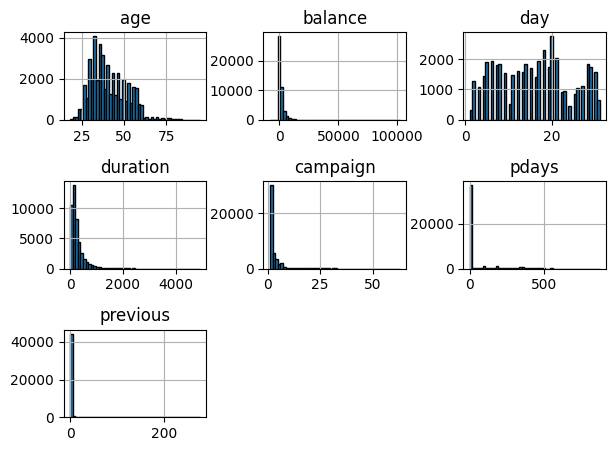

In [9]:
full_data.hist(figsize=(7,5),bins=50,edgecolor='black')
plt.subplots_adjust(hspace=0.7,wspace=0.4);

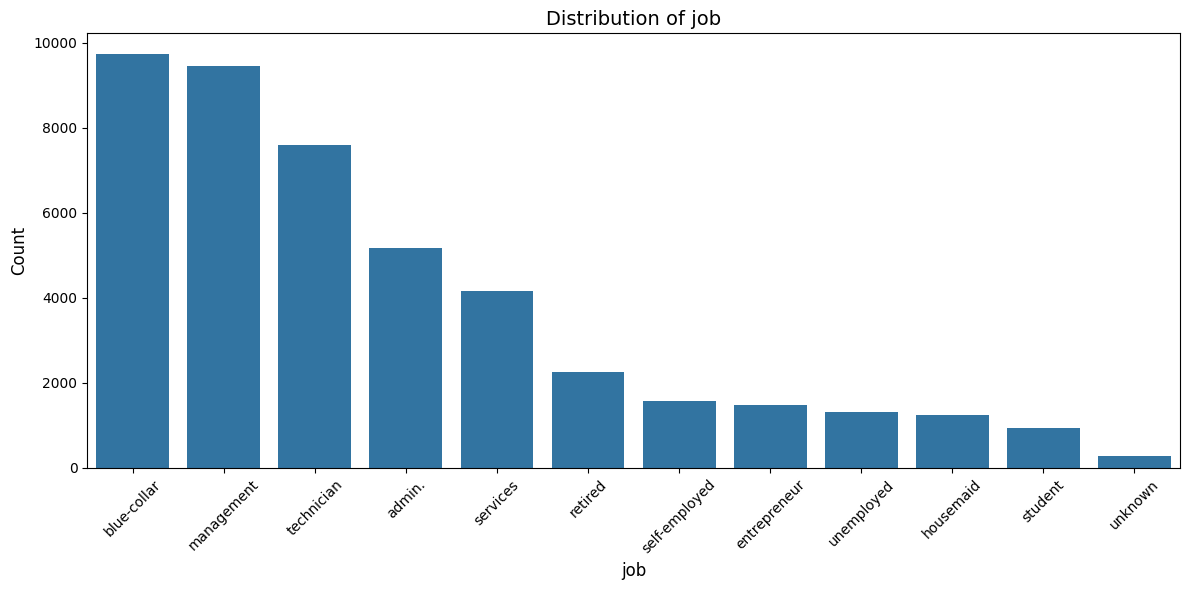

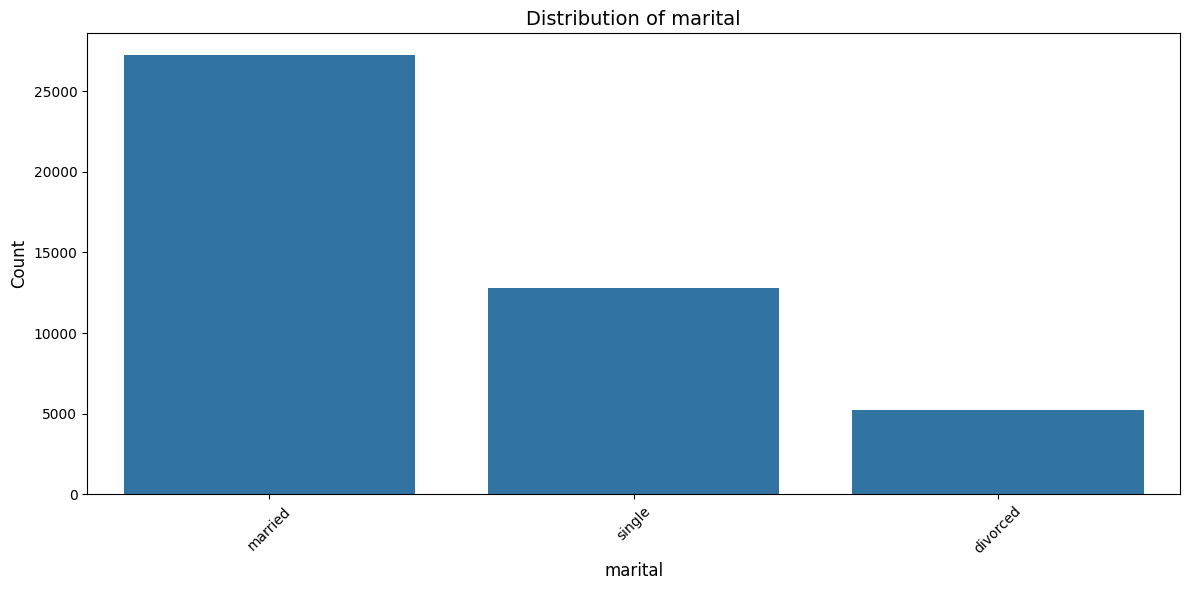

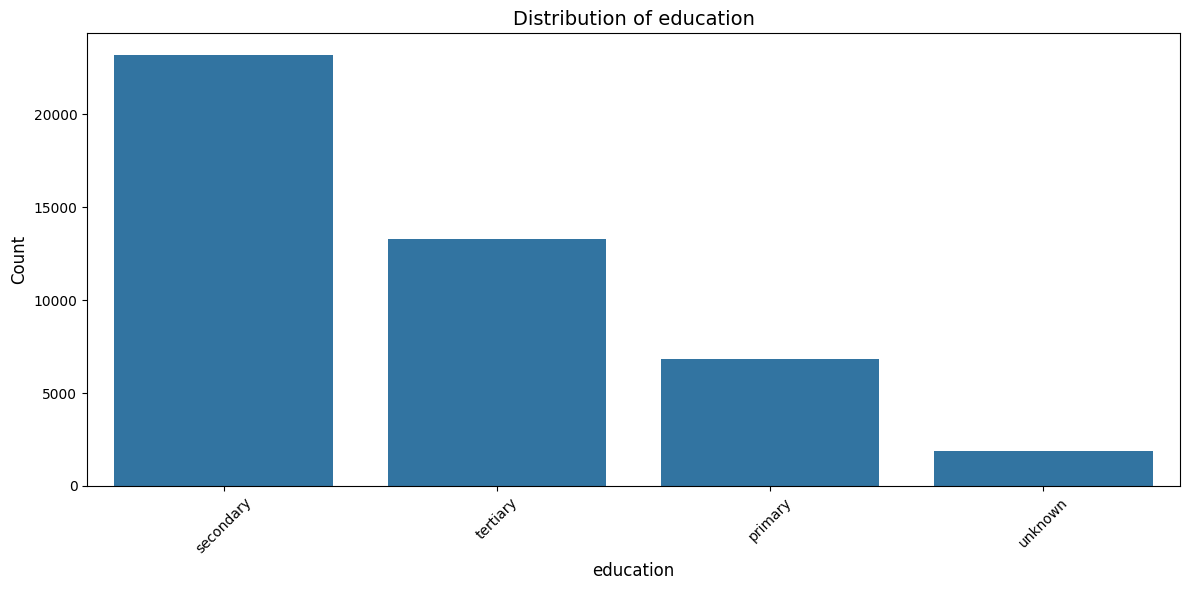

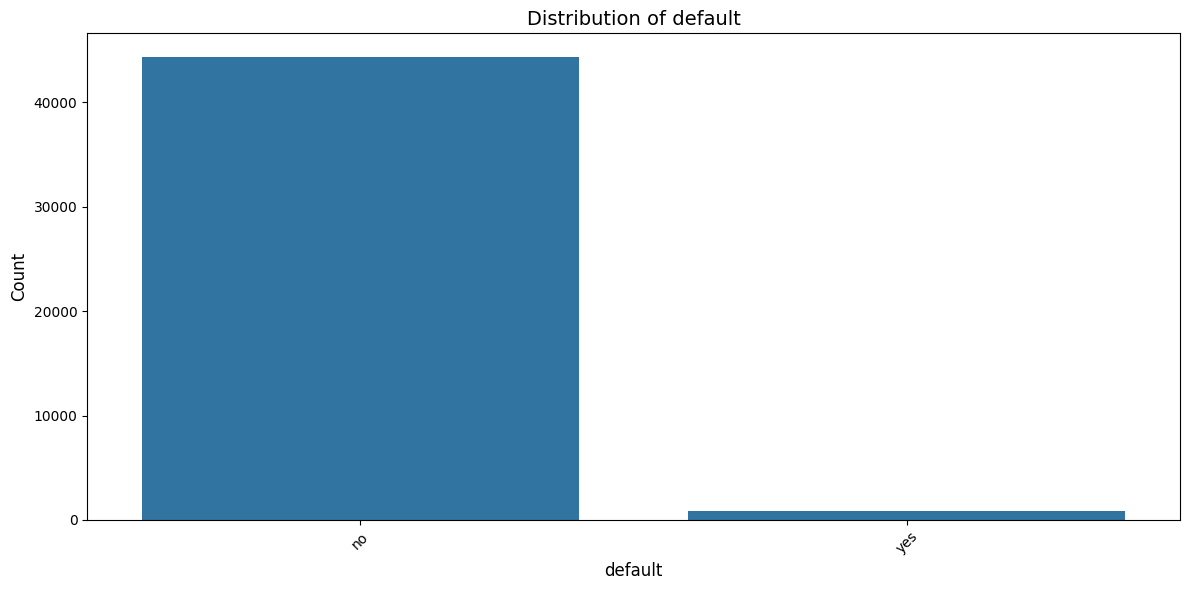

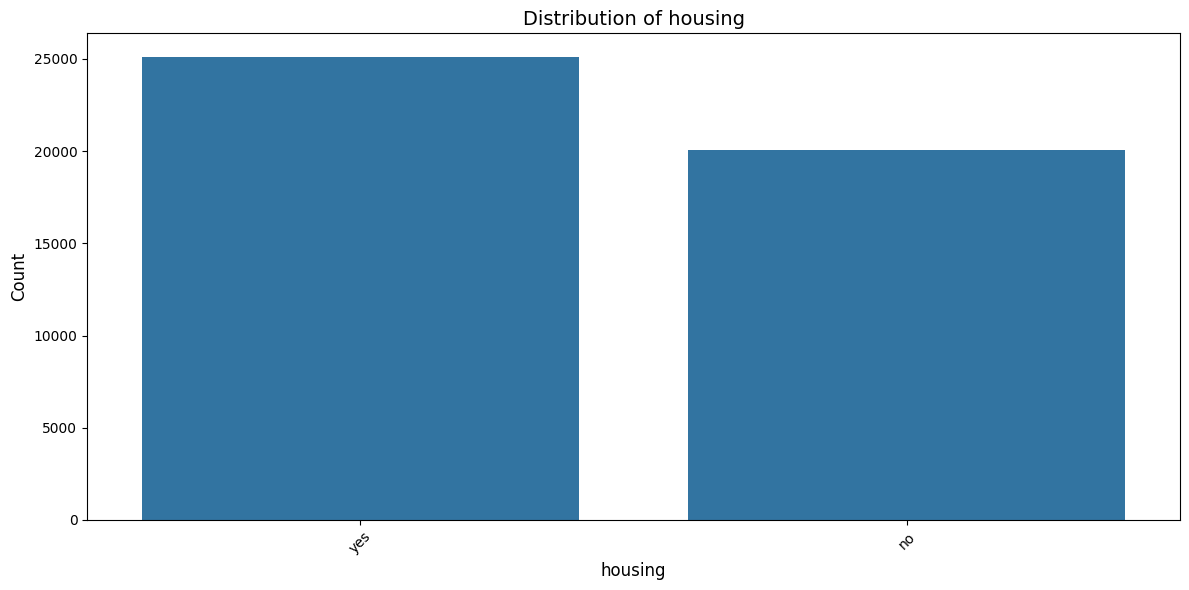

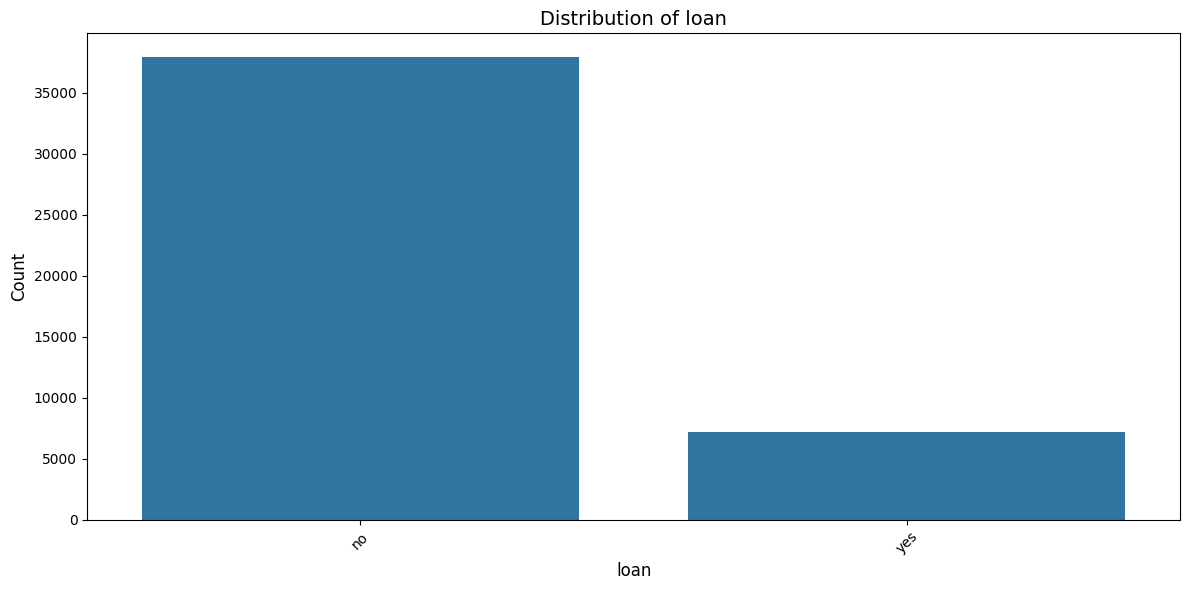

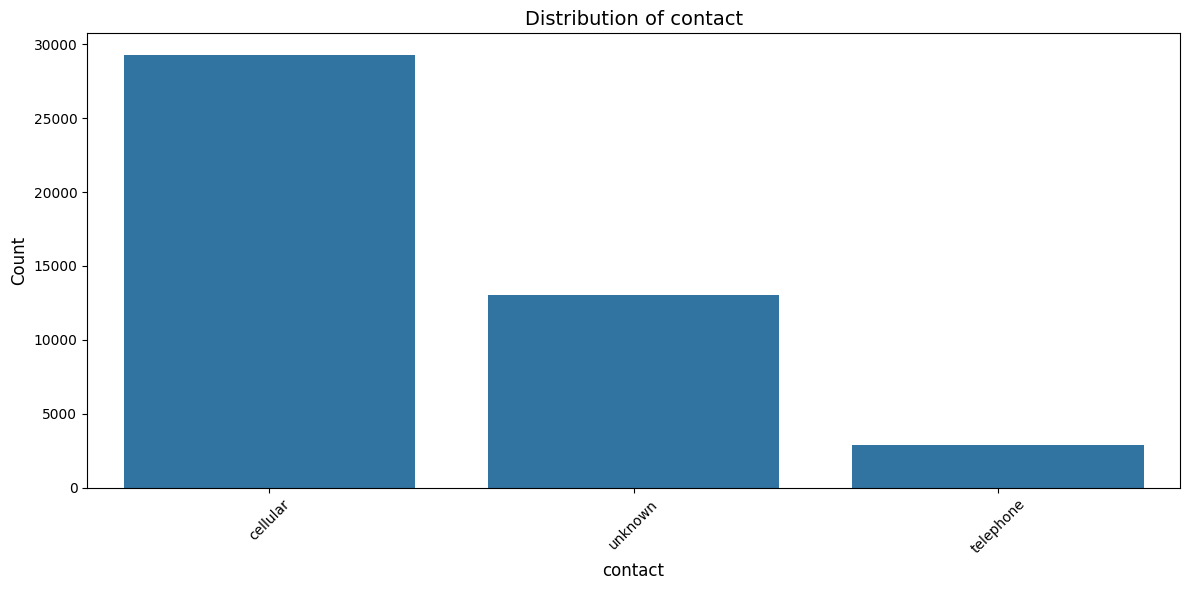

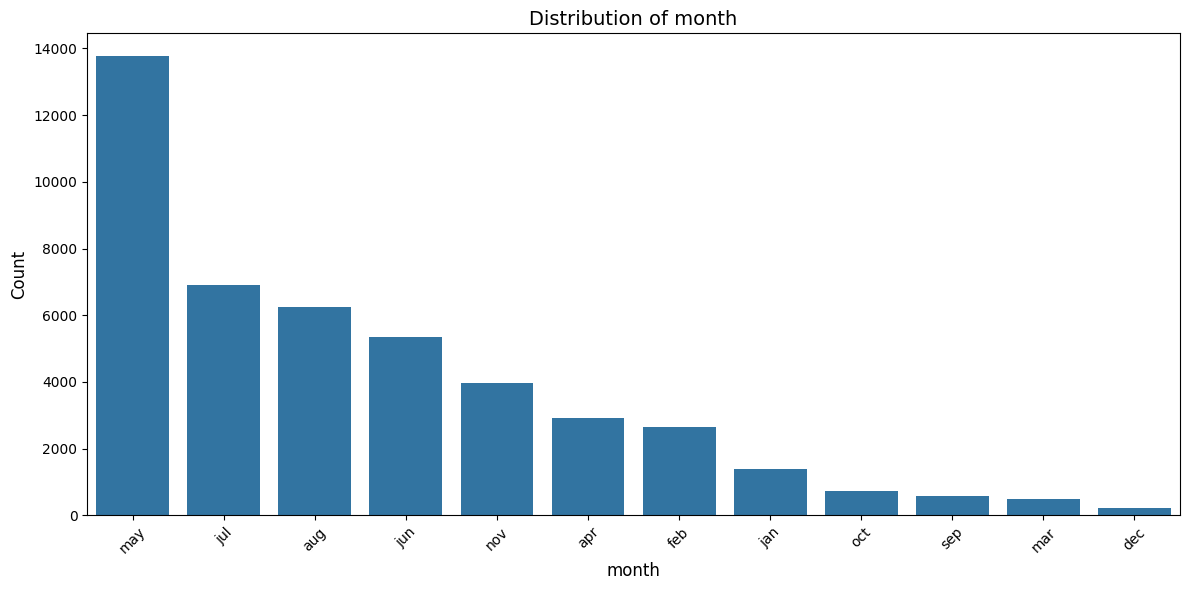

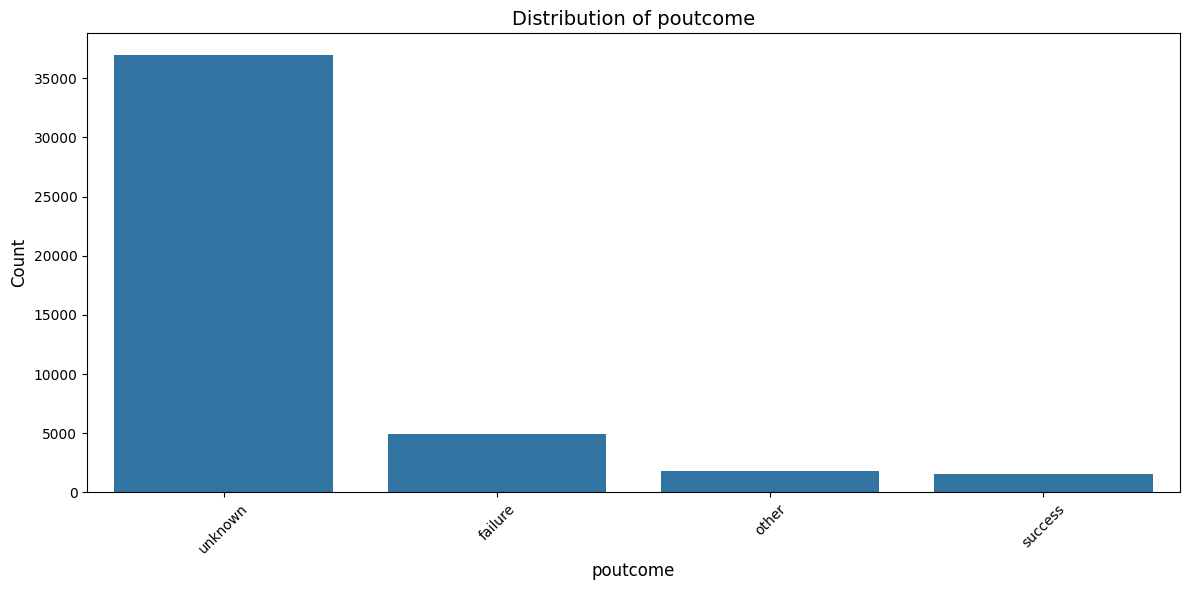

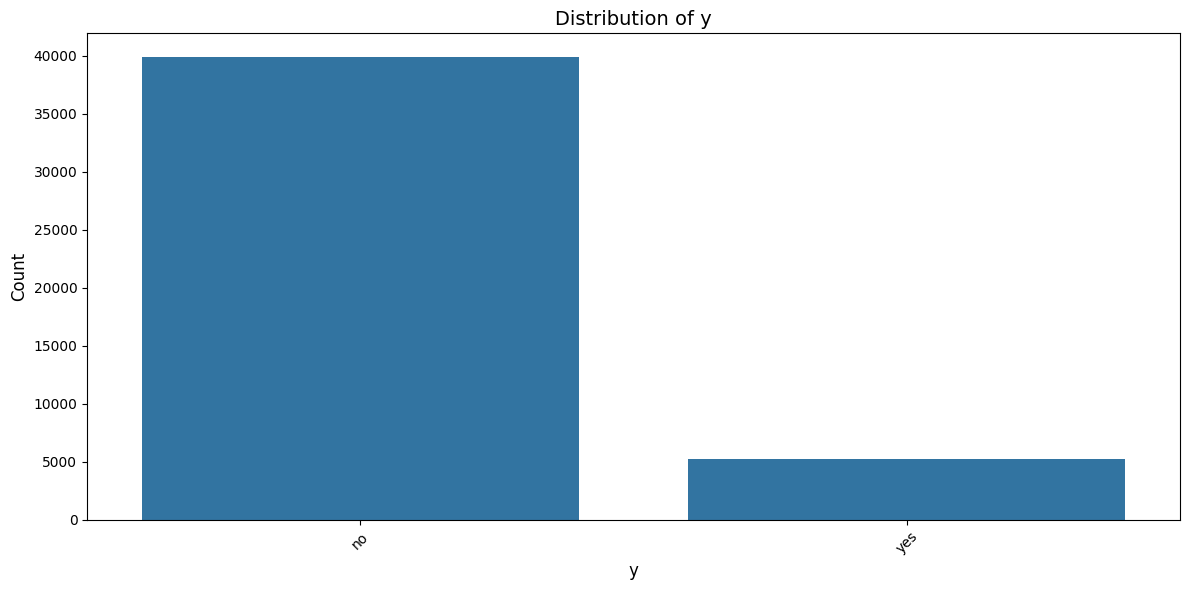

In [10]:
# Top categorical features visualization
categorical_features = full_data[cat_cols]

for col in categorical_features.columns:
    plt.figure(figsize=(12, 6))  # Adjusted for better spacing
    sns.countplot(data=full_data, x=col, order=full_data[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

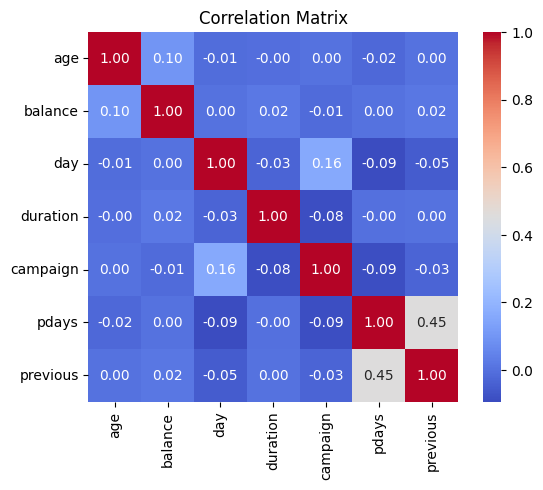

In [11]:
#Bivariate analysis
numerical_features = full_data[num_cols]
plt.figure(figsize=(12, 6))
corr = numerical_features.corr()
plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

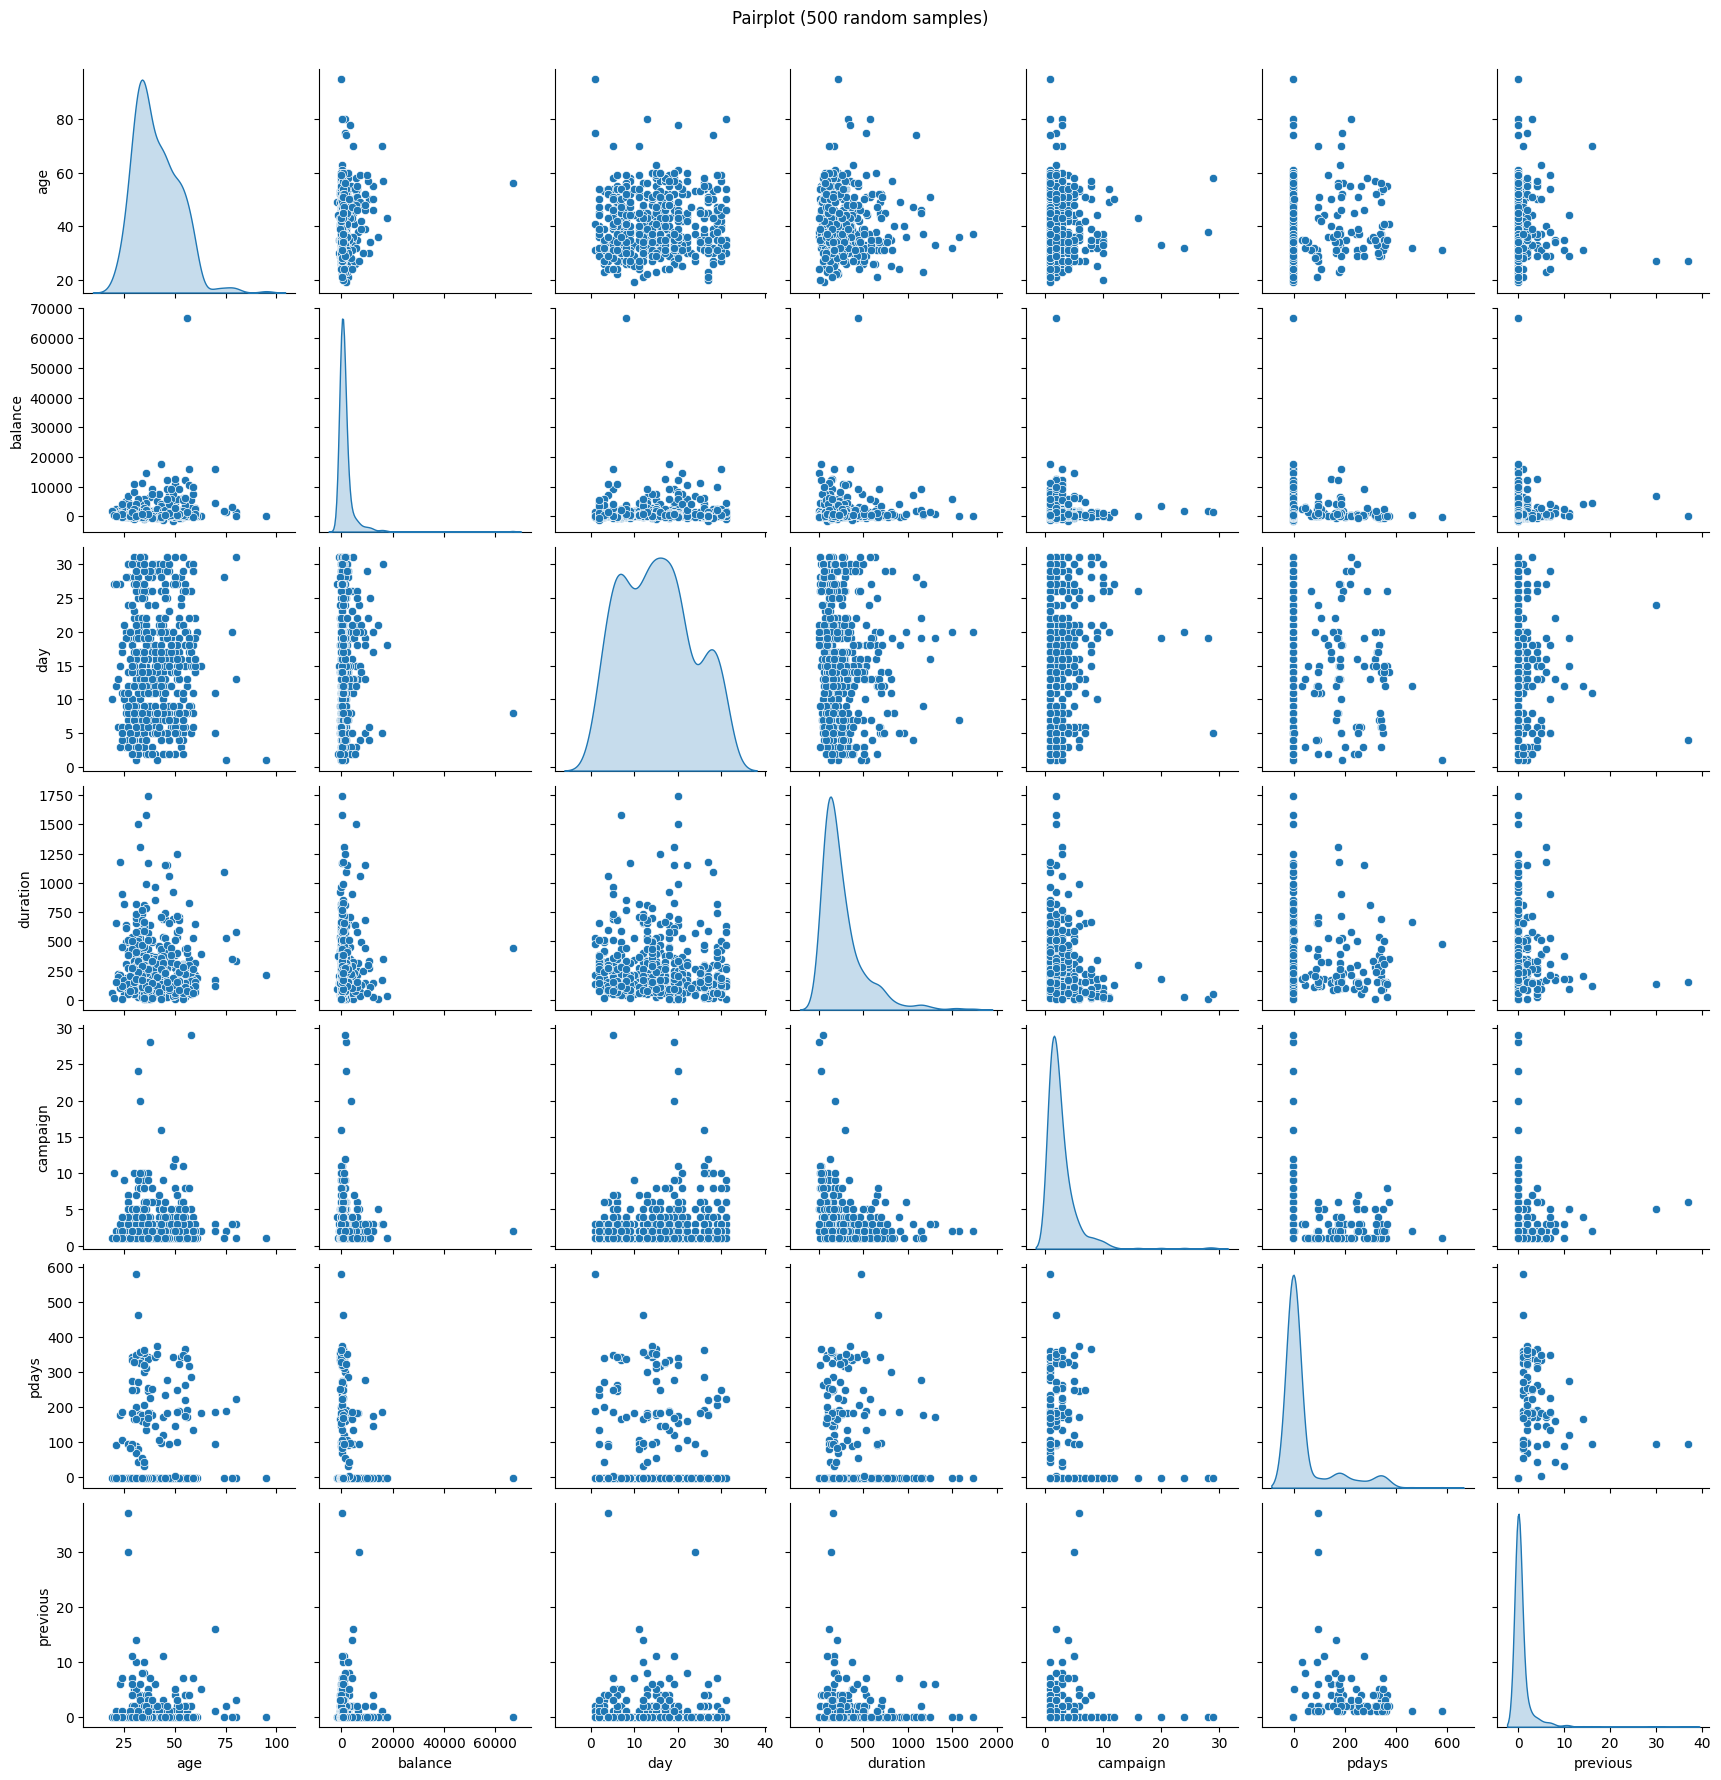

In [12]:
sns.pairplot(numerical_features.sample(500), kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot (500 random samples)", y=1.02)
plt.show()


In [13]:
### Campaign‑specific insights 

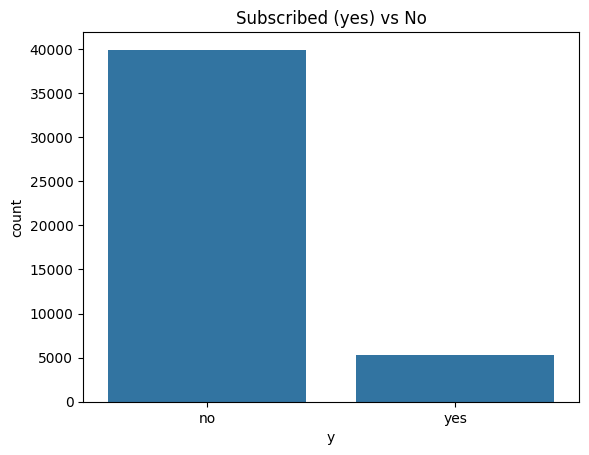

In [14]:
# Marketing outcome distribution
if 'y' in full_data.columns:
    sns.countplot(x='y', data=full_data)
    plt.title("Subscribed (yes) vs No")
    plt.show()

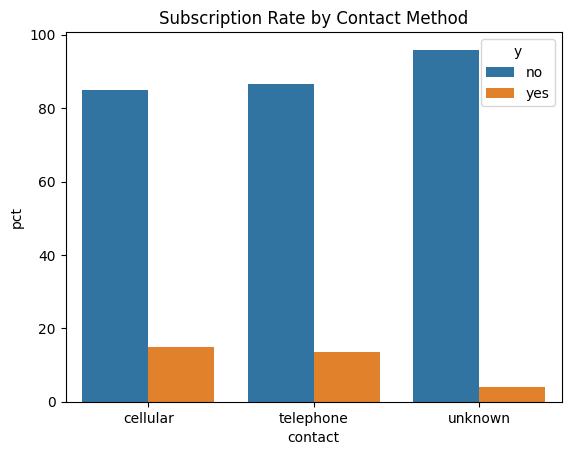

In [15]:
# Success rate by contact type
if set(['contact','y']).issubset(full_data.columns):
    rate = full_data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
    plt.figure()
    sns.barplot(x='contact', y='pct', hue='y', data=rate)
    plt.title("Subscription Rate by Contact Method")
    plt.show()

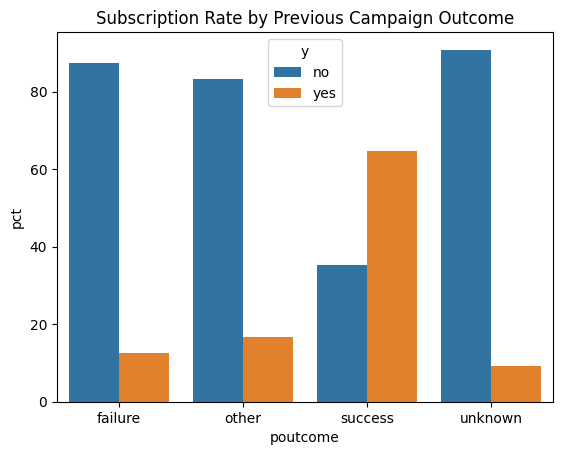

In [16]:
# Campaign response by previous outcome
if set(['poutcome','y']).issubset(full_data.columns):
    rate2 = full_data.groupby('poutcome')['y'].value_counts(normalize=True).mul(100).rename('pct').reset_index()
    plt.figure()
    sns.barplot(x='poutcome', y='pct', hue='y', data=rate2)
    plt.title("Subscription Rate by Previous Campaign Outcome")
    plt.show()

## Feature Engineering

In [17]:
#making sure there is no data leakage 
import pandas as pd

assert full_data.duplicated().sum() == 0, "full_data contains duplicates!"


training_data = pd.merge(
    full_data,
    sample_data.drop_duplicates(),
    how='left',
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])


training_data.reset_index(drop=True, inplace=True)


In [18]:

print(f"Full data rows: {len(full_data)}")
print(f"Sample (test) data rows: {len(sample_data)}")
print(f"Training data rows: {len(training_data)}")
assert len(training_data) + len(sample_data.drop_duplicates()) <= len(full_data), "Something went wrong!"


Full data rows: 45211
Sample (test) data rows: 4521
Training data rows: 40690


In [19]:
training_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
8,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
9,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no


In [20]:
target_col = 'y'

# Training set
train_X = training_data.drop(columns=[target_col])
train_y = training_data[target_col]

# Test set
test_X = sample_data.drop(columns=[target_col])
test_y = sample_data[target_col]


print(f"Train X shape: {train_X.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Test y shape: {test_y.shape}")


Train X shape: (40690, 16)
Train y shape: (40690,)
Test X shape: (4521, 16)
Test y shape: (4521,)


In [21]:

numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
ordinal_features = ['education', 'month', 'poutcome']
nominal_features = ['job', 'marital', 'contact']
binary_features = ['default', 'housing', 'loan']


for col in binary_features:
    train_X[col] = train_X[col].map({'yes': 1, 'no': 0})
    test_X[col] = test_X[col].map({'yes': 1, 'no': 0})

#y separately
train_y = train_y.map({'yes': 1, 'no': 0})
test_y = test_y.map({'yes': 1, 'no': 0})



ordinal_mapping = [
    ['unknown', 'primary', 'secondary', 'tertiary'],  # education
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],  # month
    ['unknown', 'other', 'failure', 'success']  # poutcome
]

ordinal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ordinal_mapping))
])

nominal_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



In [22]:

#numeric features transformation
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('skew', YeoJohnsonTransformer(variables=None)),
    ('outliers', Winsorizer(capping_method='gaussian', tail='right', fold=3, variables=None)),
    ('scale', StandardScaler()),
    ('drop_corr', DropCorrelatedFeatures(threshold=0.8, variables=None))
])

# create the feature engineering pipeline
feature_eng_pipeline = ColumnTransformer([
    ('numeric', numeric_transformer, numeric_features),
    ('ordinal', ordinal_transformer, ordinal_features),
    ('nominal', nominal_transformer, nominal_features)
],
    verbose_feature_names_out=False
)

In [23]:
feature_eng_pipeline.fit(train_X)



,transformers,"[('numeric', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


#trying to understand something

In [24]:
cols = feature_eng_pipeline.feature_names_in_



In [25]:
cols

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome'], dtype=object)

In [26]:

X_train_pipeline = pd.DataFrame(
    data=feature_eng_pipeline.transform(train_X)
)


In [27]:
X_train_pipeline.head(10)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.474983,0.519251,-1.348553,0.390593,-1.107492,-0.472915,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.431424,-0.451138,-1.348553,-0.221028,-1.107492,-0.472915,2.0,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.706226,-0.475017,-1.348553,-0.925134,-1.107492,-0.472915,2.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.684934,0.263979,-1.348553,-0.736032,-1.107492,-0.472915,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.706226,-0.476187,-1.348553,0.076076,-1.107492,-0.472915,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,-0.469320,-0.324075,-1.348553,-0.309607,-1.107492,-0.472915,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,-1.379144,-0.210093,-1.348553,0.179078,-1.107492,-0.472915,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,1.474983,-0.388602,-1.348553,-1.321610,-1.107492,-0.472915,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.156975,-0.302529,-1.348553,0.204887,-1.107492,-0.472915,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,-1.234023,-0.239071,-1.348553,-0.325005,-1.107492,-0.472915,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
train_X.shape

(40690, 16)

In [29]:
train_y.unique()

array([0, 1])

## Baseline

In [30]:
X_train_processed = feature_eng_pipeline.fit_transform(train_X)
X_test_processed = feature_eng_pipeline.transform(test_X)

In [31]:
# Calculate class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=train_y)
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)


Class weights: {0: np.float64(0.5663660152552753), 1: np.float64(4.266988255033557)}


In [32]:
LogisticRegression = LogisticRegression(class_weight=class_weights_dict, max_iter=1000, random_state=42)
LogisticRegression.fit(X_train_processed, train_y)
# Predict on the test set
y_pred_lr = LogisticRegression.predict(X_test_processed)
# Generate a classification report for Logistic Regression
classification_report_lr = classification_report(test_y, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_report_lr)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      4000
           1       0.33      0.82      0.47       521

    accuracy                           0.79      4521
   macro avg       0.65      0.80      0.67      4521
weighted avg       0.90      0.79      0.82      4521



Accuracy: 0.9025

Classification Report:
              precision    recall  f1-score   support

           0     0.9165    0.9790    0.9467      4000
           1     0.6613    0.3148    0.4265       521

    accuracy                         0.9025      4521
   macro avg     0.7889    0.6469    0.6866      4521
weighted avg     0.8870    0.9025    0.8868      4521



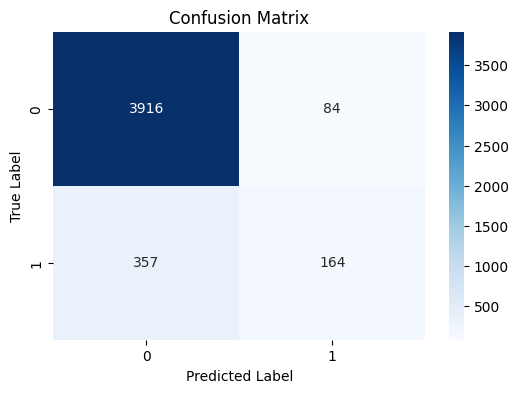

In [33]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_processed, train_y)

# 2. Predict on test set
y_pred = rf_clf.predict(X_test_processed)

# 3. Evaluate the model
print("Accuracy:", round(accuracy_score(test_y, y_pred), 4))
print("\nClassification Report:")
print(classification_report(test_y, y_pred, digits=4))

# 4. Optional: Confusion matrix plot
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities
y_probs = rf_clf.predict_proba(X_test_processed)[:, 1]

# Custom threshold for classification
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Evaluate
print("Classification Report (custom threshold):")
print(classification_report(test_y, y_pred_custom))
print(f"ROC AUC Score: {roc_auc_score(test_y, y_probs):.4f}")


Classification Report (custom threshold):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4000
           1       0.52      0.66      0.58       521

    accuracy                           0.89      4521
   macro avg       0.74      0.79      0.76      4521
weighted avg       0.90      0.89      0.90      4521

ROC AUC Score: 0.9246


Automate the process


In [35]:

workflow = Pipeline([
    ('feature_engineering', feature_eng_pipeline),
    ('classifier', rf_clf)
])

# Fit the pipeline on raw training data
workflow.fit(train_X, train_y)

# Predict probabilities using the full pipeline
y_probs = workflow.predict_proba(test_X)[:, 1] 

# Apply custom threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Predict labels using default 0.5 threshold (from pipeline directly)
y_pred_workflow = workflow.predict(test_X)

# Evaluation using custom threshold
print("Classification Report (custom threshold):")
print(classification_report(test_y, y_pred_custom))

# Evaluation using default threshold
print("\nClassification Report (default threshold):")
print(classification_report(test_y, y_pred_workflow))

# ROC AUC Score (unchanged by threshold)
print(f"\nROC AUC Score: {roc_auc_score(test_y, y_probs):.4f}")


Classification Report (custom threshold):
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4000
           1       0.52      0.66      0.58       521

    accuracy                           0.89      4521
   macro avg       0.74      0.79      0.76      4521
weighted avg       0.90      0.89      0.90      4521


Classification Report (default threshold):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.66      0.31      0.43       521

    accuracy                           0.90      4521
   macro avg       0.79      0.65      0.69      4521
weighted avg       0.89      0.90      0.89      4521


ROC AUC Score: 0.9246


Save the model

In [36]:
import joblib
joblib.dump(workflow, 'app/src/artefacts/bank_marketing_workflow.pkl')


['app/src/artefacts/bank_marketing_workflow.pkl']

In [38]:
##checking somethinf\g
additional_data = pd.read_csv('app/src/artefacts/data/bank-additional-full.csv', sep=";")

In [39]:
additional_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
additional_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
